The raw dataset still contains bad masks. This code is used fo the purpose of exclude these masks by removing masks have area less than a threshold

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

## Cal THRESHOLD

THRESH = 1670, 1742, 1965, 2063, 1755, 1755, 1928, 1927, 1951

W = [79, 80, 65, 36, 21, 79, 83, 22, 74]

H = [33, 34, 80, 88, 79, 21, 22, 83, 74]

ratio = [ 2.39, 2.35, 0.8125, 0.41, 0.265,
       3.76, 3.77, 0.26, 1.]

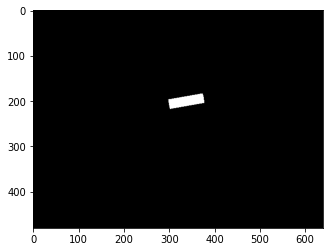

In [ ]:
mask = cv2.imread('/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Mask10120.png', 0)
plt.imshow(mask, cmap='gray')


In [ ]:
print(np.count_nonzero(mask))
print(mask.sum()/255)

1951
1951.0


In [ ]:
width = []
height = []
for i in range(1,10):
  mask = cv2.imread('/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Mask'+ str(i) + '0120.png', 0)
  r, c = np.where(mask==255)
  x1 = c.min()
  x2 = c.max()
  y1 = r.min()
  y2 = r.max()
  w = x2 -x1 
  h = y2 -y1
  width.append(w)
  height.append(h)

## Create Dataset

In [ ]:
THRESH = {"PipeI": 1700*0.8}

In [ ]:
subset       = 'val'
source_dir   = '/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Raw_Dataset/val_raw'
anno_dir     = '/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Dataset/'      + subset + '/annotation.json'
image_dir    = '/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Dataset/'     + subset + '/image'
mask_dir     = '/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Dataset/'     + subset + '/mask'
anno_raw_dir = '/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Raw_Dataset/' + subset + '_annotation.json'

In [ ]:
annotation_file = {}
with open(anno_raw_dir, 'r') as file:
  anno_raw = json.load(file)

for img_id in range(200):
  img_file = "Image_" + str(img_id) + "0120.png"
  img = cv2.imread(os.path.join(source_dir, img_file))
  img_name = img_file[:-8] + '.png'
  cv2.imwrite(os.path.join(image_dir,img_name), img)

  mask_file = source_dir + '/' + img_file[:-8] + '_mask0120.png'
  num_objects =  anno_raw[str(img_id)]["num_objects"]
  full_mask = np.zeros((480,640))
  num_masks = 0
  mask_level = 1
  list_objects_raw = anno_raw[str(img_id)]["objects"]
  list_objects = []
  masks = cv2.imread(mask_file, 0)
  for i in range(num_objects):
    mask = np.zeros((480,640))
    mask[np.where(masks==(i+1))] = 1
    name_obj = list_objects_raw[i]
    if np.count_nonzero(mask) >= THRESH[name_obj]:
      full_mask += mask * mask_level
      list_objects.append(name_obj)
      num_masks += 1
      mask_level += 1
  mask_name = img_file[:-8] + '_mask.png'
  cv2.imwrite(os.path.join(mask_dir, mask_name), full_mask)

  annotation_one_image = { "filename":  img_name,
                           "maskimage": mask_name,
                           "num_objects": num_objects,
                           "num_masks"  : num_masks,
                           "objects" : list_objects
                         }
  annotation_file[img_id] = annotation_one_image 

# If annatation not exist
with open(anno_dir, 'w') as file:
    json.dump(annotation_file, file)


In [ ]:
# annotation has already exist
file_dir = '/content/annotation.json'
with open(file_dir, 'r') as outfile:
  data = json.load(outfile)
end_key = int(list(data.keys())[-1])
data_dict = {
          "filename":  img_name,
          "maskimage": mask_name,
          "num_object": num_object,
          "num_mask"  : num_mask
    }
data[str(end_key+1)] = data_dict
with open(file_dir, 'w') as outfile:
  json.dump(data, outfile)

# Test Mask

In [ ]:
subset = 'val'
image_dir = '/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Dataset/' + subset + '/image'
mask_dir =  '/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Dataset/' + subset + '/mask'
anno_dir =  '/content/gdrive/MyDrive/OBJECT_DETECT_MASKRCNN/Dataset/' + subset + '/annotation.json'

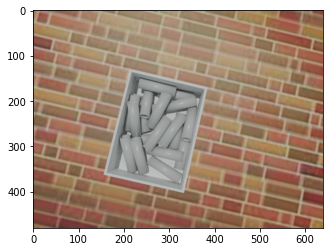

In [ ]:
img_name = 'Image_166.png'
img = cv2.imread(os.path.join(image_dir, img_name))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

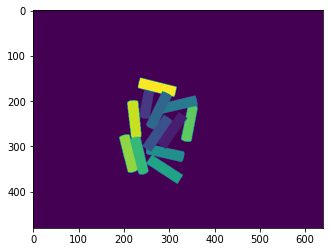

In [ ]:
mask_name = 'Image_166_mask.png'
masks = cv2.imread(os.path.join(mask_dir, mask_name), 0)
plt.imshow(masks)

In [ ]:
mask = np.zeros((480,640))
mask[np.where(masks==12)] = 1

In [ ]:
masks.max()

12

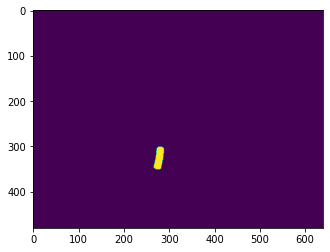

In [ ]:
plt.imshow(mask)

In [ ]:
with open(anno_dir, 'r') as file:
  anno = json.load(file)
print(anno["199"]["objects"])

['PipeI', 'PipeI', 'PipeI', 'PipeI', 'PipeI', 'PipeI', 'PipeI']


In [ ]:
len(anno)

200

In [ ]:
anno["19"]["num_masks"]

11

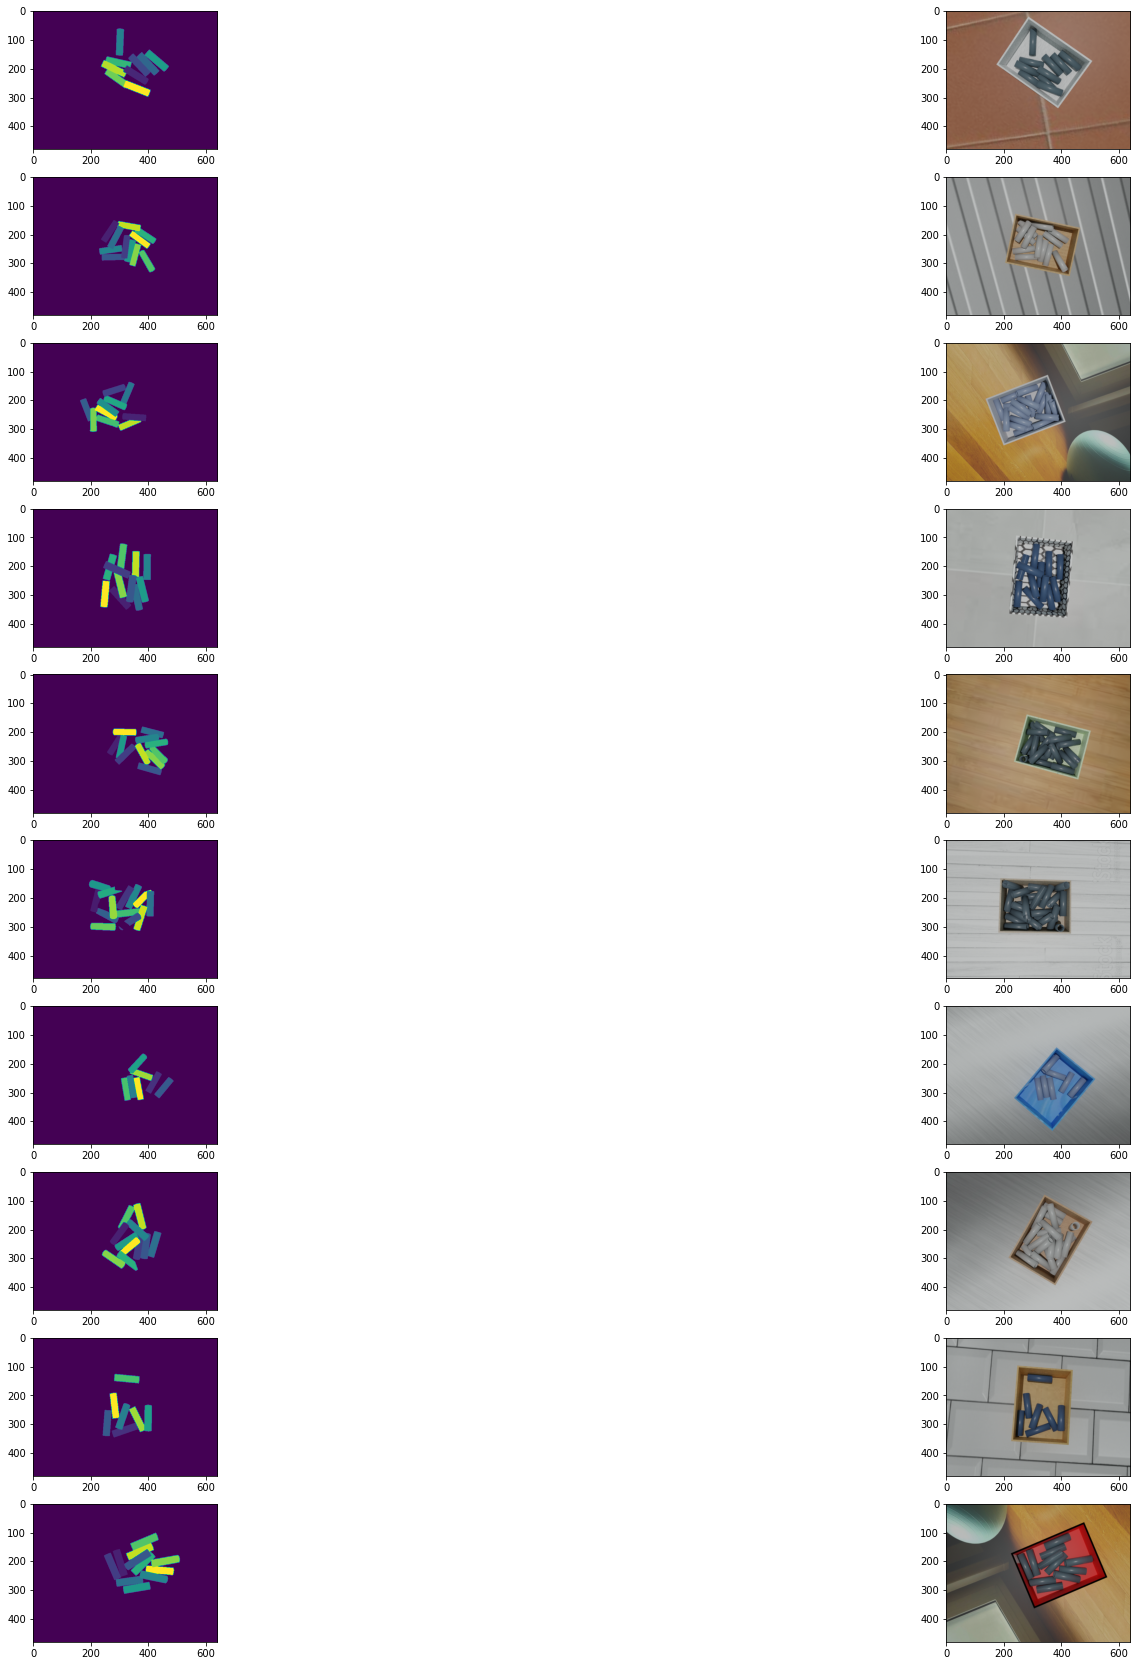

In [ ]:
fig = plt.figure(figsize = (30,30))
columns = 2
rows = 10
j= 1
for i in range(1, columns*rows+1):
  fig.add_subplot(rows, columns, i)
  if i%2 == 0:
    img_file = image_dir + '/' + 'Image_' + str(10*j + (i-1)//2) + '.png'
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
  else:
    mask_file = mask_dir + '/' + 'Image_' + str(10*j + (i-1)//2) + '_mask.png'
    mask = cv2.imread(mask_file, 0)
    plt.imshow(mask)
plt.show()